In [232]:
import practicalSPARQL
import pandas as pd
import ast
import matplotlib.pyplot as plt

In [233]:
root_q = 'queries'
root_d = 'results'

# read login data
login = pd.read_json('config_sparql.json')
ENDPOINT = login['endpoint'][0]
USERNAME = login['username'][0]
PASSWORD = login['password'][0]

# create sparql object
sparql = practicalSPARQL.practicalWrapper(ENDPOINT)
sparql.setCredentials(USERNAME, PASSWORD)

print("--- Querying ENDPOINT: {} ---".format(ENDPOINT))

--- Querying ENDPOINT: http://devmeta.sphaera.mpiwg-berlin.mpg.de/sparql ---


In [234]:
q = practicalSPARQL.stringify_SPARQL('elements_query_050824.sparql')    # select data from the ttl file as a dataframe
df = sparql.select_as_dataframe(q)

------ Endpoint not found - Sleeping for 5 seconds and retrying ------


In [235]:
# Keyword to search for
keyword_to_search = 'CK_Sphericity of the Earth'

# Filter rows where 'keywords' contains the keyword
filtered_df = df[df['cks'].str.contains(fr'\b{keyword_to_search}\b', case=False, na=False)]

#mergeing all the df
sphericity_earth = filtered_df[['images', 'cluster_name', 'cks', 'bid', 'custom_identifier', 'year', 'place']]
sphericity_earth.rename(columns={'custom_identifier': 'part_id'}, inplace=True)

C:\Users\nogas\AppData\Local\Temp\ipykernel_22504\2751648793.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sphericity_earth.rename(columns={'custom_identifier': 'part_id'}, inplace=True)


In [236]:
#unique_values = sphericity_earth['cluster_name'].unique()
#unique_df = pd.DataFrame(unique_values, columns=['cluster_name'])
#unique_df.to_excel('sphericity_earth_clusters.xlsx', index=False, sheet_name='Sheet1')

In [237]:
path_to_xlsx = 'C:\\Users\\nogas\\Image_data\\sphericity_earth_clusters.xlsx'
visual_data = pd.read_excel(path_to_xlsx)

In [238]:
q = practicalSPARQL.stringify_SPARQL('books_query.sparql')    # select data from the ttl file as a dataframe
books = sparql.select_as_dataframe(q)

In [239]:
path_to_xlsx1 = 'C:\\Users\\nogas\\Image_data\\treatises_books_part_types.xlsx'
treatises_books_part_types = pd.read_excel(path_to_xlsx1)
treatises_books_part_types = treatises_books_part_types[['bid', 'custom_identifier', 'part_type']]
treatises_books_part_types.rename(columns={'custom_identifier': 'part_id'}, inplace=True)

In [240]:
merged_df_1 = pd.merge(sphericity_earth, visual_data, on='cluster_name')

# Convert 'part_id' to string in both DataFrames
merged_df_1['part_id'] = merged_df_1['part_id'].astype(str)
treatises_books_part_types['part_id'] = treatises_books_part_types['part_id'].astype(str)

# Perform the merge
sphericity_earth_full = pd.merge(merged_df_1, treatises_books_part_types, on='part_id')

sphericity_earth_full

,images,cluster_name,cks,bid_x,part_id,year,place,lines showing sight,3D,full circle,double images,multiple perspectives and or moments,human figures,diagram,scale representation,other material representation,other decoration,color,bid_y,part_type
0,http://db.sphaera.mpiwg-berlin.mpg.de/containe...,SAC_SIL_00633,"CK_Sphericity of the Earth, CK_Visibility of S...",2201,100,1489,Leipzig,yes,2D,semi-circle,yes,yes,no,no,no,no,no,no,1594,100
1,http://db.sphaera.mpiwg-berlin.mpg.de/containe...,SAC_SIL_00633,"CK_Sphericity of the Earth, CK_Visibility of S...",2201,100,1489,Leipzig,yes,2D,semi-circle,yes,yes,no,no,no,no,no,no,1597,100
2,http://db.sphaera.mpiwg-berlin.mpg.de/containe...,SAC_SIL_00633,"CK_Sphericity of the Earth, CK_Visibility of S...",2201,100,1489,Leipzig,yes,2D,semi-circle,yes,yes,no,no,no,no,no,no,1609,100
3,http://db.sphaera.mpiwg-berlin.mpg.de/containe...,SAC_SIL_00633,"CK_Sphericity of the Earth, CK_Visibility of S...",2201,100,1489,Leipzig,yes,2D,semi-circle,yes,yes,no,no,no,no,no,no,1611,100
4,http://db.sphaera.mpiwg-berlin.mpg.de/containe...,SAC_SIL_00633,"CK_Sphericity of the Earth, CK_Visibility of S...",2201,100,1489,Leipzig,yes,2D,semi-circle,yes,yes,no,no,no,no,no,no,1612,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15435,http://dev.sphaera.mpiwg-berlin.mpg.de/contain...,SAC_SIL_00612,CK_Sphericity of the Earth,2264,779,1564,Leipzig,no,2D,full circle,no,no,no,no,no,no,no,no,2264,influenced_100
15436,http://dev.sphaera.mpiwg-berlin.mpg.de/contain...,SAC_SIL_01948,"CK_Sphericity of the Earth, CK_Visibility of S...",2264,779,1564,Leipzig,no,3D,full circle,no,no,yes,no,no,no,no,no,2263,influenced_100
15437,http://dev.sphaera.mpiwg-berlin.mpg.de/contain...,SAC_SIL_01948,"CK_Sphericity of the Earth, CK_Visibility of S...",2264,779,1564,Leipzig,no,3D,full circle,no,no,yes,no,no,no,no,no,2264,influenced_100
15438,http://dev.sphaera.mpiwg-berlin.mpg.de/contain...,SAC_SIL_02031,"CK_Lunar Eclipse, CK_Sphericity of the Earth",2264,779,1564,Leipzig,no,3D,full circle,no,no,no,no,no,no,no,no,2263,influenced_100


C:\Users\nogas\AppData\Local\Temp\ipykernel_22504\583739999.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  unique_images = sphericity_earth_full.groupby('interval')['images'].nunique()
C:\Users\nogas\AppData\Local\Temp\ipykernel_22504\583739999.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  books_count = books.groupby('interval').size()


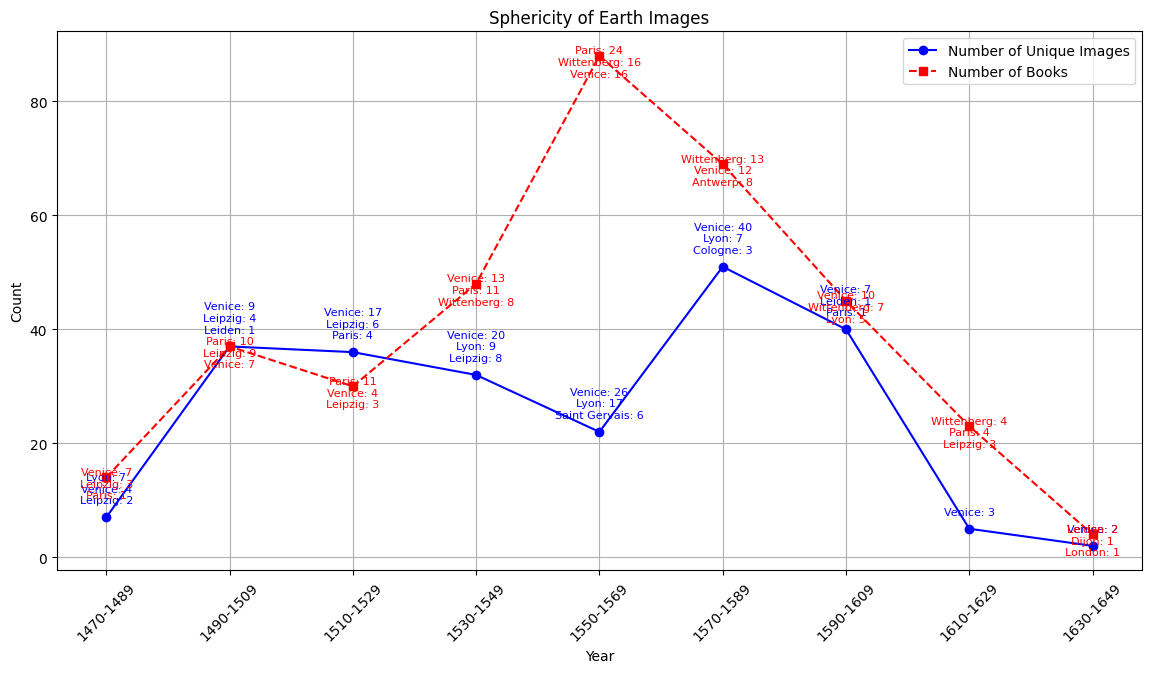

In [241]:
# Ensure the 'year' column is of type int
sphericity_earth_full['year'] = sphericity_earth_full['year'].astype(int)
books['year'] = books['year'].astype(int)

# Create 20-year intervals
bins = [1470, 1490, 1510, 1530, 1550, 1570, 1590, 1610, 1630, 1650]
labels = ['1470-1489', '1490-1509', '1510-1529', '1530-1549', '1550-1569', '1570-1589', '1590-1609', '1610-1629', '1630-1649']

# Create a new column for the 20-year intervals in both DataFrames
sphericity_earth_full['interval'] = pd.cut(sphericity_earth_full['year'], bins=bins, labels=labels, right=False)
books['interval'] = pd.cut(books['year'], bins=bins, labels=labels, right=False)

# Group by interval and count unique images
unique_images = sphericity_earth_full.groupby('interval')['images'].nunique()

# Group by interval and count the number of books
books_count = books.groupby('interval').size()

# Function to get the top three places with the most unique images for each interval
def get_top_places_per_interval(interval):
    interval_df = sphericity_earth_full[sphericity_eart_full['interval'] == interval]
    top_places = interval_df.groupby('place')['images'].nunique().nlargest(3)
    return top_places

# Function to get the most common places for each interval in the books DataFrame
def get_most_common_places_per_interval(interval):
    interval_df = books[books['interval'] == interval]
    most_common_places = interval_df['place'].value_counts().head(3)
    return most_common_places

# Plot the results
plt.figure(figsize=(14, 7))

# Plot unique images by interval
plt.plot(unique_images.index, unique_images.values, marker='o', linestyle='-', color='blue', label='Number of Unique Images')

# Plot number of books by interval
plt.plot(books_count.index, books_count.values, marker='s', linestyle='--', color='red', label='Number of Books')

# Add annotations for the top three places for unique images
for interval in labels:
    if interval in unique_images.index:
        top_places = get_top_places_per_interval(interval)
        annotation_text = '\n'.join([f'{place}: {count}' for place, count in top_places.items()])
        
        # Get the y-value for annotation
        unique_image_count = unique_images.loc[interval]
                
        # Annotation for unique images line
        plt.annotate(annotation_text, (interval, unique_image_count), textcoords="offset points", xytext=(0, 10), ha='center', fontsize=8, color='blue')

# Add annotations for the most common places for books
for interval in labels:
    if interval in books_count.index:
        common_places = get_most_common_places_per_interval(interval)
        annotation_text = '\n'.join([f'{place}: {count}' for place, count in common_places.items()])
        
        # Get the y-value for annotation
        book_count = books_count.loc[interval]
                
        # Annotation for books line
        plt.annotate(annotation_text, (interval, book_count), textcoords="offset points", xytext=(0, -15), ha='center', fontsize=8, color='red')

plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Sphericity of Earth Images')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

C:\Users\nogas\AppData\Local\Temp\ipykernel_22504\2207811006.py:13: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['1470-1489', '1470-1489', '1470-1489', '1470-1489', '1470-1489', ..., '1550-1569', '1550-1569', '1550-1569', '1550-1569', '1550-1569']
Length: 15440
Categories (10, object): ['1470-1489' < '1490-1509' < '1510-1529' < '1530-1549' ... '1590-1609' < '1610-1629' < '1630-1649' < '1650-1669']' has dtype incompatible with category, please explicitly cast to a compatible dtype first.
  sphericity_earth_full.loc[:, 'interval'] = pd.cut(sphericity_earth_full['year'], bins=bins, labels=labels, right=False)
C:\Users\nogas\AppData\Local\Temp\ipykernel_22504\2207811006.py:14: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['1470-1489', '1510-1529', '1490-1509', '1510-1529', '1510-1529', ..., '1550-1569', '1570-1589', '1570-1589', '1530-1549', '15

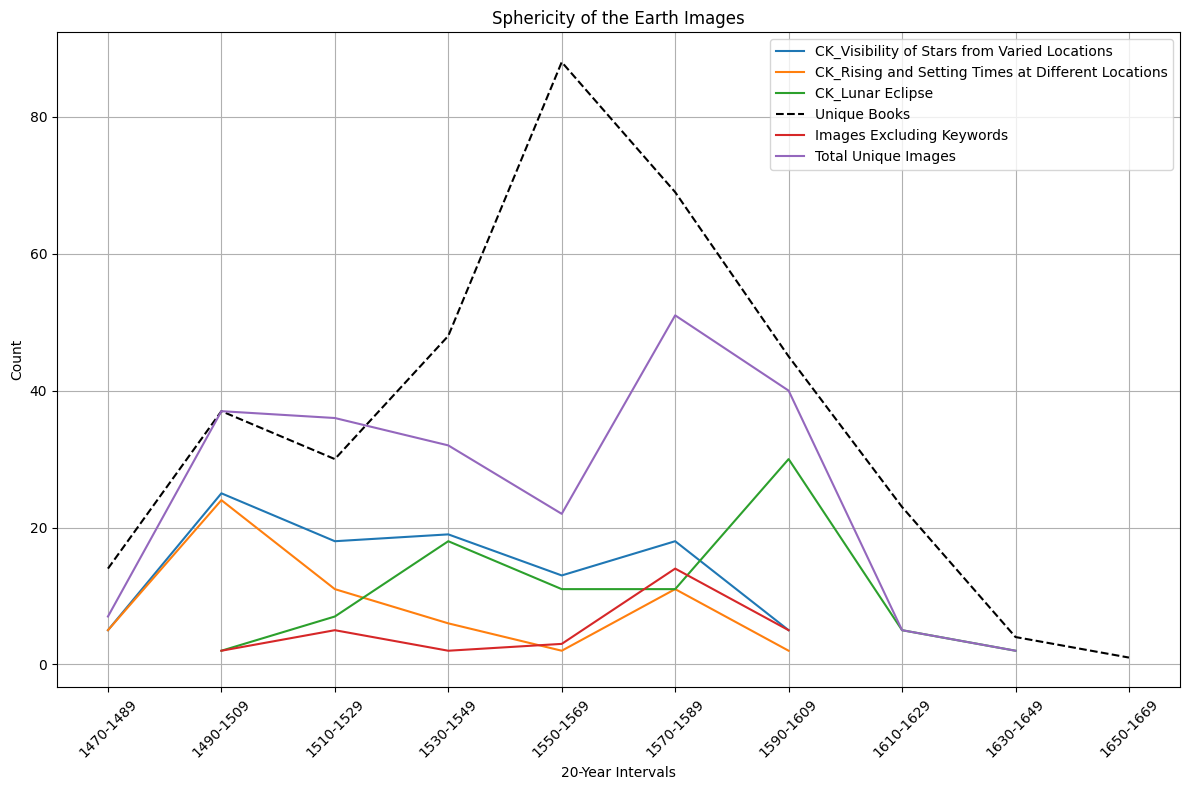

In [242]:
# Define the 20-year intervals
bins = [1470, 1490, 1510, 1530, 1550, 1570, 1590, 1610, 1630, 1650, 1670]
labels = ['1470-1489', '1490-1509', '1510-1529', '1530-1549', '1550-1569', '1570-1589', '1590-1609', '1610-1629', '1630-1649', '1650-1669']

# Convert year columns to numeric
sphericity_earth_full.loc[:, 'year'] = pd.to_numeric(sphericity_earth_full['year'], errors='coerce')
books.loc[:, 'year'] = pd.to_numeric(books['year'], errors='coerce')

# Convert 'cks' column to string
sphericity_earth_full.loc[:, 'cks'] = sphericity_earth_full['cks'].astype(str)

# Add an 'interval' column to both DataFrames
sphericity_earth_full.loc[:, 'interval'] = pd.cut(sphericity_earth_full['year'], bins=bins, labels=labels, right=False)
books.loc[:, 'interval'] = pd.cut(books['year'], bins=bins, labels=labels, right=False)

# Filter sphericity_earth for each keyword and count unique images
def count_unique_images_for_cks(cks_value):
    return sphericity_earth_full[sphericity_earth_full['cks'].str.contains(cks_value, na=False)].groupby('interval', observed=True)['images'].nunique()

cks_values_list = {
    'CK_Visibility of Stars from Varied Locations': 'CK_Visibility of Stars from Varied Locations',
    'CK_Rising and Setting Times at Different Locations': 'CK_Rising and Setting Times at Different Locations', 
    'CK_Lunar Eclipse': 'CK_Lunar Eclipse'
}

# Prepare data for plotting
plot_data = pd.DataFrame(index=labels)

for label, cks_value in cks_values_list.items():
    plot_data[label] = count_unique_images_for_cks(cks_value)

# Calculate number of unique books in each interval
book_counts = books.groupby('interval', observed=True)['book'].nunique()
plot_data['Unique Books'] = book_counts

# Calculate number of unique images that do not have the specified keywords
keywords_to_exclude = ['CK_Visibility of Stars from Varied Locations', 'CK_Rising and Setting Times at Different Locations', 'CK_Lunar Eclipse']
def count_unique_images_excluding_keywords(keywords):
    mask = sphericity_earth_full['cks'].str.contains('|'.join(keywords), na=False)
    return sphericity_earth_full[~mask].groupby('interval', observed=True)['images'].nunique()

plot_data['Images Excluding Keywords'] = count_unique_images_excluding_keywords(keywords_to_exclude)

# Calculate total number of unique images in each interval
total_unique_images = sphericity_earth_full.groupby('interval', observed=True)['images'].nunique()
plot_data['Total Unique Images'] = total_unique_images

# Plotting
plt.figure(figsize=(12, 8))

# Plot each line with default color and style
for column in plot_data.columns:
    if column == 'Unique Books':
        plt.plot(plot_data.index, plot_data[column], label=column, color='black', linestyle='--')
    else:
        plt.plot(plot_data.index, plot_data[column], label=column)

plt.xlabel('20-Year Intervals')
plt.ylabel('Count')
plt.title('Sphericity of the Earth Images')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\nogas\AppData\Local\Temp\ipykernel_22504\1086330000.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return filtered_df.groupby('interval')['images'].nunique()
C:\Users\nogas\AppData\Local\Temp\ipykernel_22504\1086330000.py:43: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_unique_books_df = books.groupby('interval')['book'].nunique()
C:\Users\nogas\AppData\Local\Temp\ipykernel_22504\1086330000.py:49: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt th

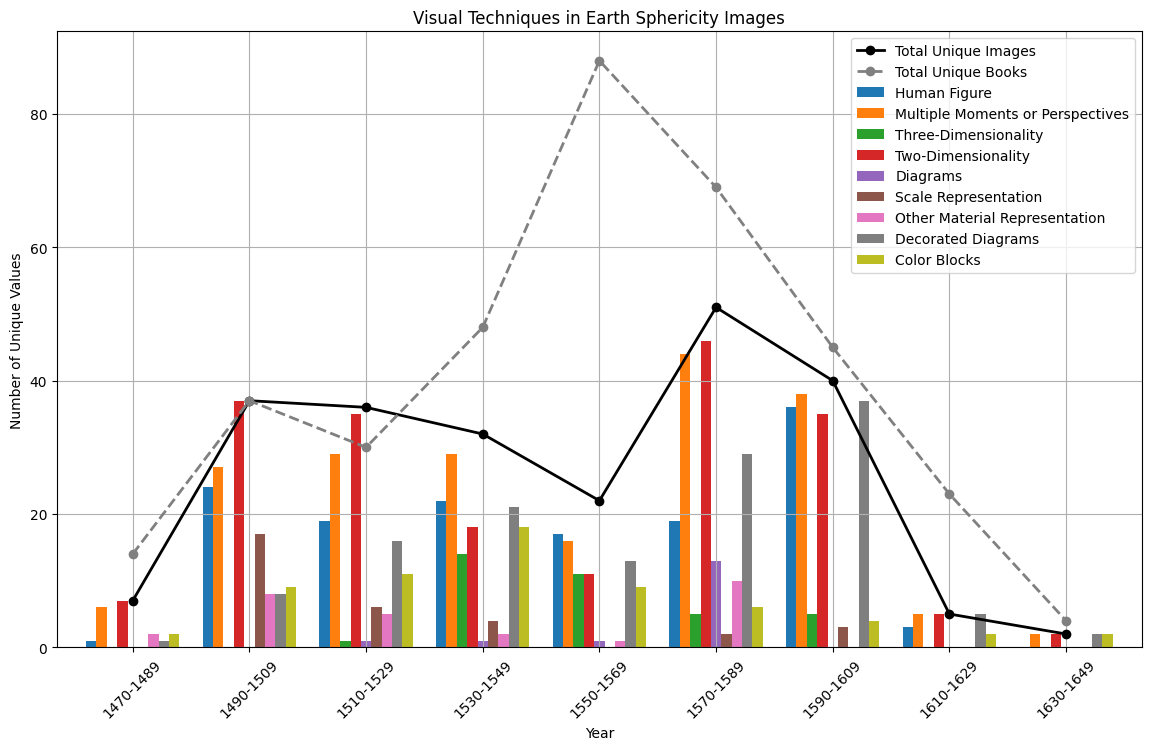

In [243]:
# Ensure the 'year' column is of type int
sphericity_earth_full['year'] = sphericity_earth_full['year'].astype(int)

# Create 20-year intervals
bins = [1470, 1490, 1510, 1530, 1550, 1570, 1590, 1610, 1630, 1650]
labels = ['1470-1489', '1490-1509', '1510-1529', '1530-1549', '1550-1569', '1570-1589', '1590-1609', '1610-1629', '1630-1649']

# Create a new column for the 20-year intervals
sphericity_earth_full['interval'] = pd.cut(sphericity_earth_full['year'], bins=bins, labels=labels, right=False)

# Filter and group data for each category
def count_unique_images_by_column(column_name, value):
    filtered_df = sphericity_earth_full[sphericity_earth_full[column_name] == value]
    return filtered_df.groupby('interval')['images'].nunique()

# Collect data
human_figures = count_unique_images_by_column('human figures', 'yes')
multiple_perspectives = count_unique_images_by_column('multiple perspectives and or moments', 'yes')
three_dimensionality = count_unique_images_by_column('3D', '3D')
two_dimensionality = count_unique_images_by_column('3D', '2D')
diagrams = count_unique_images_by_column('diagram', 'yes')
scale_representation = count_unique_images_by_column('scale representation', 'yes')
other_material_representation = count_unique_images_by_column('other material representation', 'yes')
decorated_diagrams = count_unique_images_by_column('other decoration', 'yes')
color_blocks = count_unique_images_by_column('color', 'yes')

# Combine the data for side-by-side bars
side_by_side_data = pd.DataFrame({
    'Human Figure': human_figures,
    'Multiple Moments or Perspectives': multiple_perspectives,
    'Three-Dimensionality': three_dimensionality,
    'Two-Dimensionality': two_dimensionality,
    'Diagrams': diagrams,
    'Scale Representation': scale_representation,
    'Other Material Representation': other_material_representation,
    'Decorated Diagrams': decorated_diagrams,
    'Color Blocks': color_blocks 
})

# Ensure 'books' DataFrame is defined and has the correct columns
# For demonstration, let's assume it has the same structure as `sphericity_eart_full`
# If 'books' is a different DataFrame, adjust accordingly.
total_unique_books_df = books.groupby('interval')['book'].nunique()

# Plot side-by-side bar chart
ax = side_by_side_data.plot(kind='bar', figsize=(14, 8), width=0.8)

# Calculate total number of unique images in 'sphericity_eart_full' for each interval
total_unique_images = sphericity_earth_full.groupby('interval')['images'].nunique()

# To ensure the lines overlay correctly, match the x-tick positions
xticks = ax.get_xticks()
xticks_labels = [tick.get_text() for tick in ax.get_xticklabels()]

# Plot the lines for total unique images and total unique books
ax.plot(xticks, total_unique_images.reindex(xticks_labels).values, marker='o', linestyle='-', color='black', label='Total Unique Images', linewidth=2)
ax.plot(xticks, total_unique_books_df.reindex(xticks_labels).values, marker='o', linestyle='--', color='gray', label='Total Unique Books', linewidth=2)

plt.xlabel('Year')
plt.ylabel('Number of Unique Values')
plt.title('Visual Techniques in Earth Sphericity Images')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

C:\Users\nogas\AppData\Local\Temp\ipykernel_22504\993948844.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return filtered_df.groupby('interval')['images'].nunique()
C:\Users\nogas\AppData\Local\Temp\ipykernel_22504\993948844.py:46: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_unique_books_df = books.groupby('interval')['book'].nunique()
C:\Users\nogas\AppData\Local\Temp\ipykernel_22504\993948844.py:49: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the f

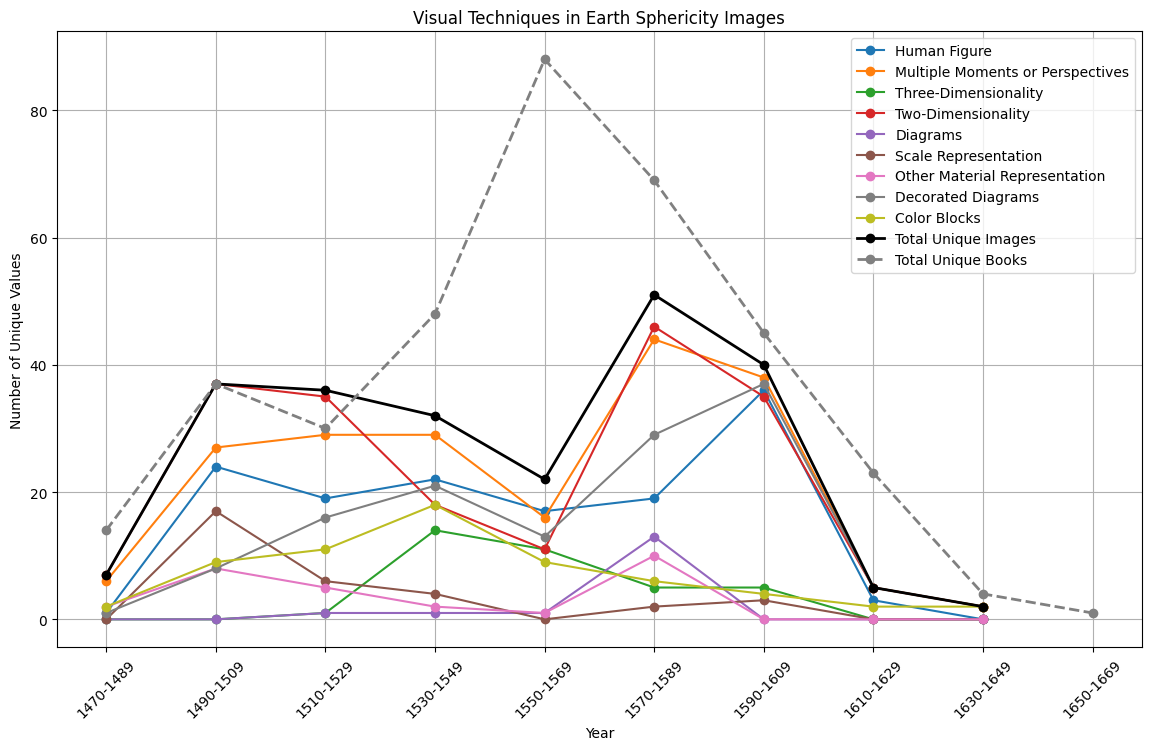

In [244]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure the 'year' column is of type int
sphericity_earth_full['year'] = sphericity_earth_full['year'].astype(int)

# Create 20-year intervals
bins = [1470, 1490, 1510, 1530, 1550, 1570, 1590, 1610, 1630, 1650]
labels = ['1470-1489', '1490-1509', '1510-1529', '1530-1549', '1550-1569', '1570-1589', '1590-1609', '1610-1629', '1630-1649']

# Create a new column for the 20-year intervals
sphericity_earth_full['interval'] = pd.cut(sphericity_earth_full['year'], bins=bins, labels=labels, right=False)

# Filter and group data for each category
def count_unique_images_by_column(column_name, value):
    filtered_df = sphericity_earth_full[sphericity_earth_full[column_name] == value]
    return filtered_df.groupby('interval')['images'].nunique()

# Collect data
human_figures = count_unique_images_by_column('human figures', 'yes')
multiple_perspectives = count_unique_images_by_column('multiple perspectives and or moments', 'yes')
three_dimensionality = count_unique_images_by_column('3D', '3D')
two_dimensionality = count_unique_images_by_column('3D', '2D')
diagrams = count_unique_images_by_column('diagram', 'yes')
scale_representation = count_unique_images_by_column('scale representation', 'yes')
other_material_representation = count_unique_images_by_column('other material representation', 'yes')
decorated_diagrams = count_unique_images_by_column('other decoration', 'yes')
color_blocks = count_unique_images_by_column('color', 'yes')

# Combine the data for line plots
side_by_side_data = pd.DataFrame({
    'Human Figure': human_figures,
    'Multiple Moments or Perspectives': multiple_perspectives,
    'Three-Dimensionality': three_dimensionality,
    'Two-Dimensionality': two_dimensionality,
    'Diagrams': diagrams,
    'Scale Representation': scale_representation,
    'Other Material Representation': other_material_representation,
    'Decorated Diagrams': decorated_diagrams,
    'Color Blocks': color_blocks 
})

# Ensure 'books' DataFrame is defined and has the correct columns
# For demonstration, let's assume it has the same structure as `sphericity_earth_full`
# If 'books' is a different DataFrame, adjust accordingly.
total_unique_books_df = books.groupby('interval')['book'].nunique()

# Calculate total number of unique images in 'sphericity_earth_full' for each interval
total_unique_images = sphericity_earth_full.groupby('interval')['images'].nunique()

# Plot lines for each category
fig, ax = plt.subplots(figsize=(14, 8))

# Plot lines for each category
for column in side_by_side_data.columns:
    ax.plot(side_by_side_data.index, side_by_side_data[column], marker='o', label=column)

# Plot the lines for total unique images and total unique books
ax.plot(total_unique_images.index, total_unique_images.values, marker='o', linestyle='-', color='black', label='Total Unique Images', linewidth=2)
ax.plot(total_unique_books_df.index, total_unique_books_df.values, marker='o', linestyle='--', color='gray', label='Total Unique Books', linewidth=2)

plt.xlabel('Year')
plt.ylabel('Number of Unique Values')
plt.title('Visual Techniques in Earth Sphericity Images')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()


C:\Users\nogas\AppData\Local\Temp\ipykernel_22504\2196648197.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return filtered_df.groupby('interval')['images'].nunique()
C:\Users\nogas\AppData\Local\Temp\ipykernel_22504\2196648197.py:40: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_unique_books_df = books.groupby('interval')['book'].nunique()
C:\Users\nogas\AppData\Local\Temp\ipykernel_22504\2196648197.py:43: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt th

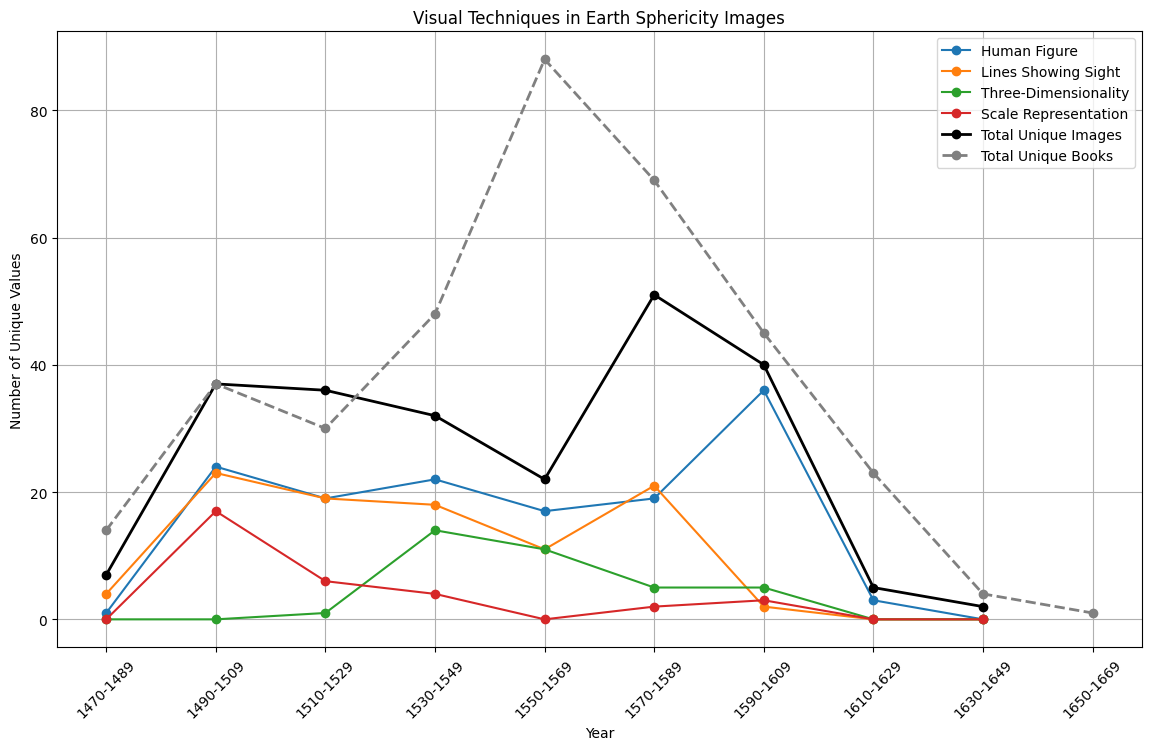

In [245]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure the 'year' column is of type int
sphericity_earth_full['year'] = sphericity_earth_full['year'].astype(int)

# Create 20-year intervals
bins = [1470, 1490, 1510, 1530, 1550, 1570, 1590, 1610, 1630, 1650]
labels = ['1470-1489', '1490-1509', '1510-1529', '1530-1549', '1550-1569', '1570-1589', '1590-1609', '1610-1629', '1630-1649']

# Create a new column for the 20-year intervals
sphericity_earth_full['interval'] = pd.cut(sphericity_earth_full['year'], bins=bins, labels=labels, right=False)

# Filter and group data for each category
def count_unique_images_by_column(column_name, value):
    filtered_df = sphericity_earth_full[sphericity_earth_full[column_name] == value]
    return filtered_df.groupby('interval')['images'].nunique()

# Collect data
human_figures = count_unique_images_by_column('human figures', 'yes')
lines_marking_sight = count_unique_images_by_column('lines showing sight', 'yes')
three_dimensionality = count_unique_images_by_column('3D', '3D')
scale_representation = count_unique_images_by_column('scale representation', 'yes')
decorated_and_material_representations = (
    count_unique_images_by_column('other material representation', 'yes') +
    count_unique_images_by_column('other decoration', 'yes')
)

# Combine the data for line plots
side_by_side_data = pd.DataFrame({
    'Human Figure': human_figures,
    'Lines Showing Sight': lines_marking_sight,
    'Three-Dimensionality': three_dimensionality,
    'Scale Representation': scale_representation,
})

# Ensure 'books' DataFrame is defined and has the correct columns
# For demonstration, let's assume it has the same structure as `sphericity_earth_full`
# If 'books' is a different DataFrame, adjust accordingly.
total_unique_books_df = books.groupby('interval')['book'].nunique()

# Calculate total number of unique images in 'sphericity_earth_full' for each interval
total_unique_images = sphericity_earth_full.groupby('interval')['images'].nunique()

# Plot lines for each category
fig, ax = plt.subplots(figsize=(14, 8))

# Plot lines for each category
for column in side_by_side_data.columns:
    ax.plot(side_by_side_data.index, side_by_side_data[column], marker='o', label=column)

# Plot the lines for total unique images and total unique books
ax.plot(total_unique_images.index, total_unique_images.values, marker='o', linestyle='-', color='black', label='Total Unique Images', linewidth=2)
ax.plot(total_unique_books_df.index, total_unique_books_df.values, marker='o', linestyle='--', color='gray', label='Total Unique Books', linewidth=2)

plt.xlabel('Year')
plt.ylabel('Number of Unique Values')
plt.title('Visual Techniques in Earth Sphericity Images')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()


In [246]:
path_to_xlsx = 'G:\\My Drive\\DataFiles\\Full_Image_List_6.5.24\\all_elements_with_part_type.xlsx'
all_keywords = pd.read_excel(path_to_xlsx)

C:\Users\nogas\AppData\Local\Temp\ipykernel_22504\1448172976.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  unique_images_keyword_1 = all_keywords[has_keyword_1].groupby('interval')['images'].nunique()
C:\Users\nogas\AppData\Local\Temp\ipykernel_22504\1448172976.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  unique_images_both_keywords = all_keywords[has_both_keywords].groupby('interval')['images'].nunique()


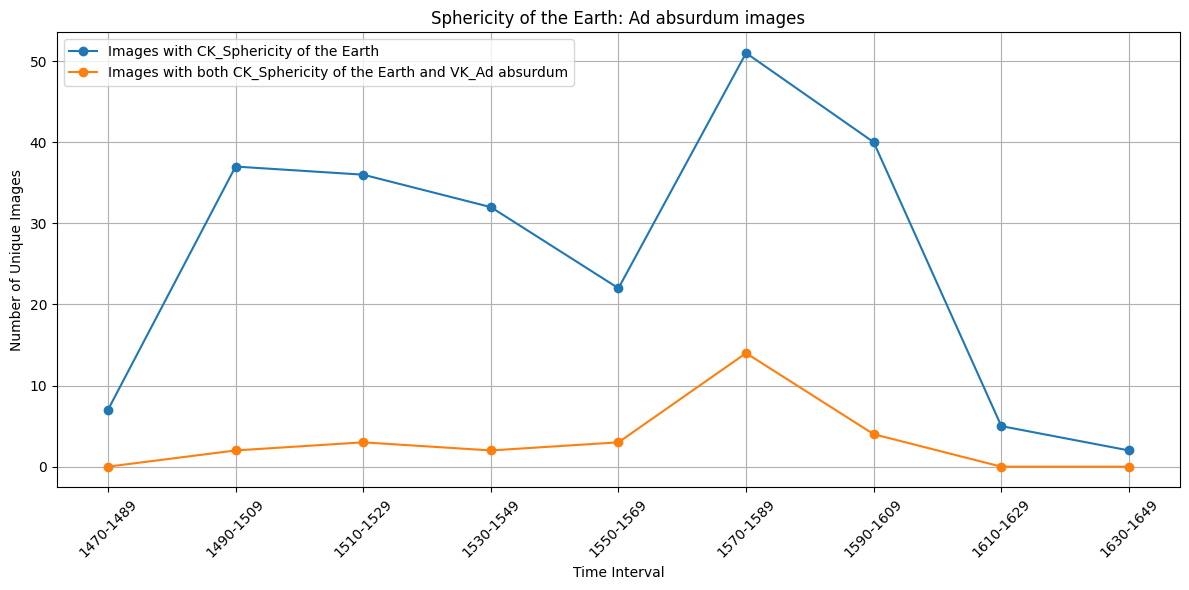

In [247]:
# Define the twenty-year intervals
bins = [1470, 1490, 1510, 1530, 1550, 1570, 1590, 1610, 1630, 1650]
labels = ['1470-1489', '1490-1509', '1510-1529', '1530-1549', '1550-1569', '1570-1589', '1590-1609', '1610-1629', '1630-1649']

# Extract the year from 'year' column and bin it into intervals
all_keywords['interval'] = pd.cut(all_keywords['year'], bins=bins, labels=labels, right=False)

# Define the keywords to filter
keyword_1 = 'CK_Sphericity of the Earth'
keyword_2 = 'VK_Ad absurdum'

# Create a boolean mask for the conditions
has_keyword_1 = all_keywords['keywords'].str.contains(keyword_1)
has_keyword_2 = all_keywords['keywords'].str.contains(keyword_2)
has_both_keywords = has_keyword_1 & has_keyword_2

# Calculate the number of unique images for each condition and interval
unique_images_keyword_1 = all_keywords[has_keyword_1].groupby('interval')['images'].nunique()
unique_images_both_keywords = all_keywords[has_both_keywords].groupby('interval')['images'].nunique()

# Plot the results
plt.figure(figsize=(12, 6))

plt.plot(unique_images_keyword_1.index, unique_images_keyword_1.values, label=f'Images with {keyword_1}', marker='o')
plt.plot(unique_images_both_keywords.index, unique_images_both_keywords.values, label=f'Images with both {keyword_1} and {keyword_2}', marker='o')

plt.xlabel('Time Interval')
plt.ylabel('Number of Unique Images')
plt.title('Sphericity of the Earth: Ad absurdum images')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()